Hunter Bennett | Glass Lab | Kupffer Strains Project | 28 March 2021

In [2]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat
from homer_preprocessing import read_annotated_peaks

# Set working directory

In [3]:
dataDirectory = '/home/h1bennet/strains/data/H3K27Ac/control/'
workingDirectory = '/home/h1bennet/strains/results/00_Strains_Control_H3K27Ac/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


## Merge peaks
### Merge poised enhancers

    mergePeaks ./active_enhancers/*active_enhancer_peaks* > \
    merged_peaks/active_enhancers_merged.txt

    annotatePeaks.pl ./merged_peaks/active_enhancers_merged.txt mm10 \
    -size 6000 -hist 50 -ghist -d \
    ./merged_tagdirs/aj_Kupffer_h3k27ac_young_control/ \
    ./merged_tagdirs/balbc_Kupffer_h3k27ac_young_control/ \
    ./merged_tagdirs/c57_Kupffer_h3k27ac_young_control/ \
    > ./merged_peaks/active_enhancers_merged_ghist.txt
    
    annotatePeaks.pl ./merged_peaks/active_enhancers_merged.txt mm10 \
    -size 1000 -hist 50 -ghist -d \
    ./merged_tagdirs/aj_Kupffer_h3k27ac_young_control/ \
    ./merged_tagdirs/balbc_Kupffer_h3k27ac_young_control/ \
    ./merged_tagdirs/c57_Kupffer_h3k27ac_young_control/ \
    > ./merged_peaks/active_enhancers_merged_1kb_ghist.txt

In [4]:
df = pd.read_csv('./merged_peaks/active_enhancers_merged_ghist.txt',
                 sep='\t',
                 index_col=0)

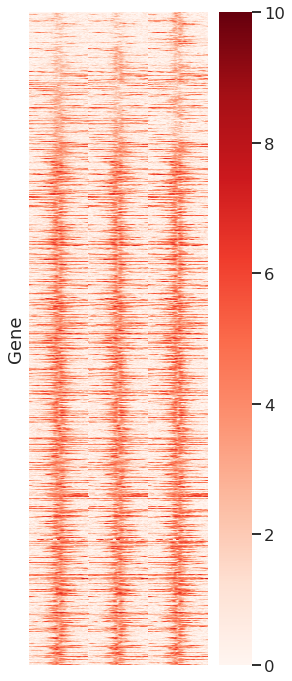

In [6]:
fig, ax = plt.subplots(figsize=(4,12))
sns.heatmap(np.log2(df+1),
            cmap='Reds',
            # cbar_kws={'label':'Normalized\nTag Density'},
            vmax=10,
            xticklabels=0,
            yticklabels=0,
            ax=ax)
plt.savefig('./fancy_figures/active_enhancers_merged_ghist_reds.png',
            bbox_inches='tight')